In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm 
import seaborn as sns
import datetime
import time

from importlib import reload
import plotly.express as px
import plotly.graph_objects as go

from tqdm.notebook import tqdm

In [2]:
import strategies

In [3]:
reload(strategies)

<module 'strategies' from 'C:\\Users\\Sharp.Ra\\PyProjects\\FinalMDS\\strategies.py'>

## Load data

In [4]:
market_orders = pd.read_feather('market_orders_USDRUB.feather')

## Run 1 period simulation

### Eq-strategy

In [5]:
start_date = datetime.datetime(2021, 7, 7, 11, 0, 0)
end_date = datetime.datetime(2021, 7, 7, 12, 0, 0)

In [6]:
stq = strategies.EquiDistantStrategy(ticksize=0.0025)

In [7]:
df = market_orders[(market_orders['Time'] >= start_date) &
                   (market_orders['Time'] <= end_date)]

In [8]:
df[:5]

,Time,AGGRESSOR_SIDE,PRICE_min,PRICE_max,SIZE_sum,Date,TimeOnly,DOW,H,Impact,BID,ASK,MID,Spread
3450992,2021-07-07 11:00:02.175743,S,74.0225,74.0225,49,2021-07-07,11:00:02.175743,3,11,0.0000,74.019997,74.029999,74.024994,0.0100
3450993,2021-07-07 11:00:02.423586,S,74.0175,74.0200,400,2021-07-07,11:00:02.423586,3,11,0.0025,74.019997,74.027496,74.023743,0.0075
3450994,2021-07-07 11:00:02.428663,S,74.0175,74.0175,152,2021-07-07,11:00:02.428663,3,11,0.0000,74.017502,74.025002,74.021255,0.0075
3450995,2021-07-07 11:00:02.430344,B,74.0175,74.0175,50,2021-07-07,11:00:02.430344,3,11,0.0000,74.014999,74.017502,74.016251,0.0025
3450996,2021-07-07 11:00:02.430467,B,74.0175,74.0175,50,2021-07-07,11:00:02.430467,3,11,0.0000,74.014999,74.017502,74.016251,0.0025


In [9]:
df_deals = stq.run_period_sim(df, 2)

C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['SIZE_sum']
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side'] = (df['AGGRESSOR_SIDE'] == 'B') * 2 - 1


In [10]:
df_deals_b = df_deals.copy()
df_deals[:5]

,Time,Wealth,Inventory,Side,Mid,Bid,Ask,R-price,Spread,PnL
0,2021-07-07 11:00:02.175743,-74.019998,1.0,1.0,74.024998,74.019998,74.029998,74.024998,0.0100,0.005000
1,2021-07-07 11:00:02.423586,-148.037494,2.0,1.0,74.023746,74.017496,74.029996,74.023746,0.0125,0.009999
2,2021-07-07 11:00:02.428663,-148.037494,2.0,0.0,74.021252,74.015002,74.027502,74.021252,0.0125,0.005009
3,2021-07-07 11:00:02.430344,-148.037494,2.0,0.0,74.016251,74.010001,74.022501,74.016251,0.0125,-0.004993
4,2021-07-07 11:00:02.430467,-148.037494,2.0,0.0,74.016251,74.010001,74.022501,74.016251,0.0125,-0.004993


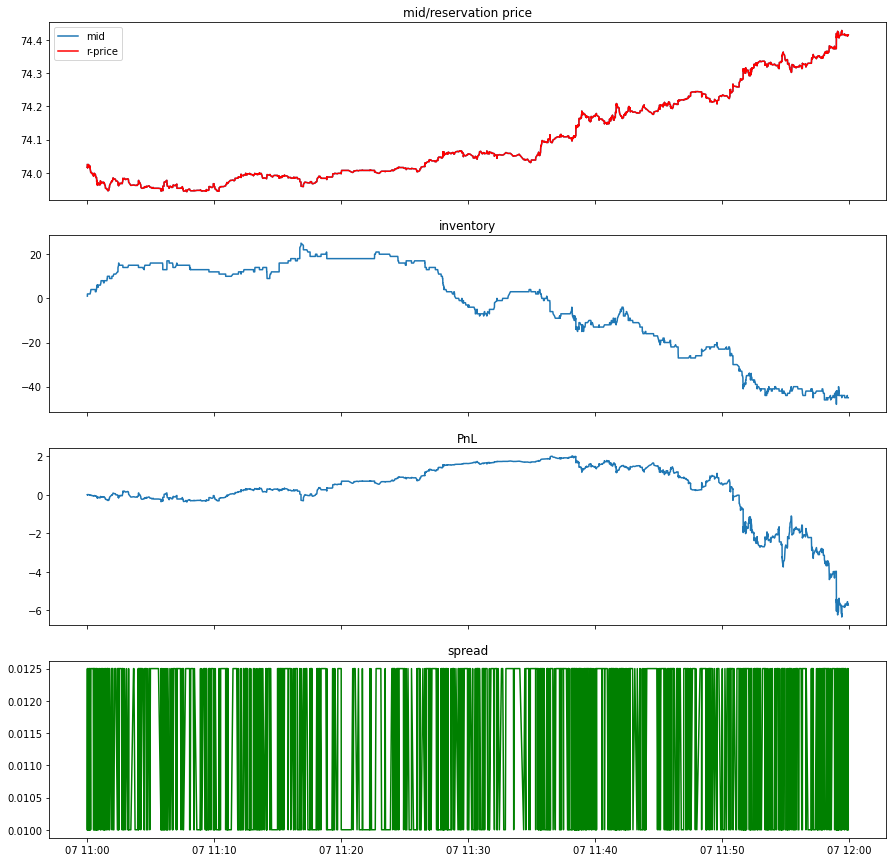

In [11]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='spread')
axes[3].title.set_text('spread')

In [13]:
df_deals[df_deals['Side']!=0].shape

(523, 10)

### AS-model

In [14]:
sta = strategies.ASModel1Strategy(ticksize=0.0025, gamma=0.2, k=2/0.0067, sigma=0.17)

In [15]:
df_deals = sta.run_period_sim(df, W=0, Q=0, min_spread=2, max_distance=5)

C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:455: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['SIZE_sum']
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:456: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side'] = (df['AGGRESSOR_SIDE'] == 'B') * 2 - 1


In [16]:
df_deals_as = df_deals.copy()
df_deals.shape

(3226, 10)

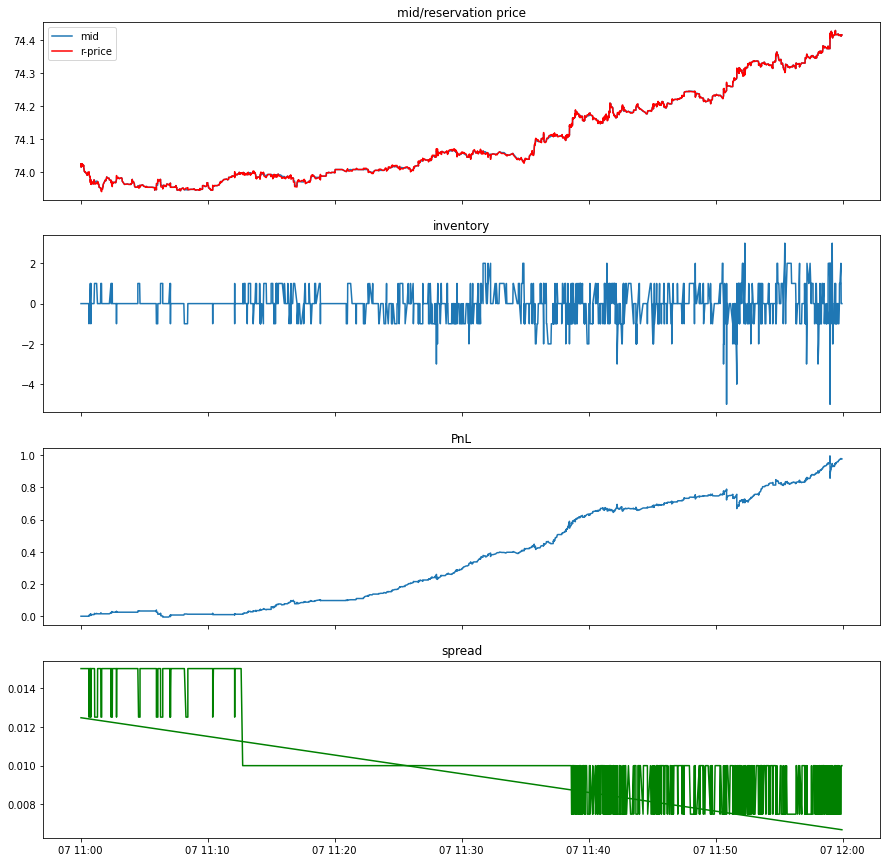

In [17]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='theoretical spread')
axes[3].plot(df_deals['Time'], df_deals['Ask']-df_deals['Bid'], 'g', label='rounded spread')
axes[3].title.set_text('spread')

In [18]:
df_deals[df_deals['Side']!=0].shape

(904, 10)

In [19]:
df_deals_b['Time'].max()

Timestamp('2021-07-07 11:59:56.344744')

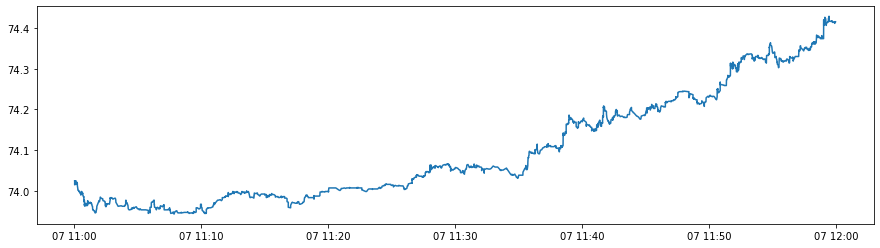

In [20]:
plt.figure(figsize=(15, 4))
plt.plot(df_deals['Time'], df_deals['Mid'])

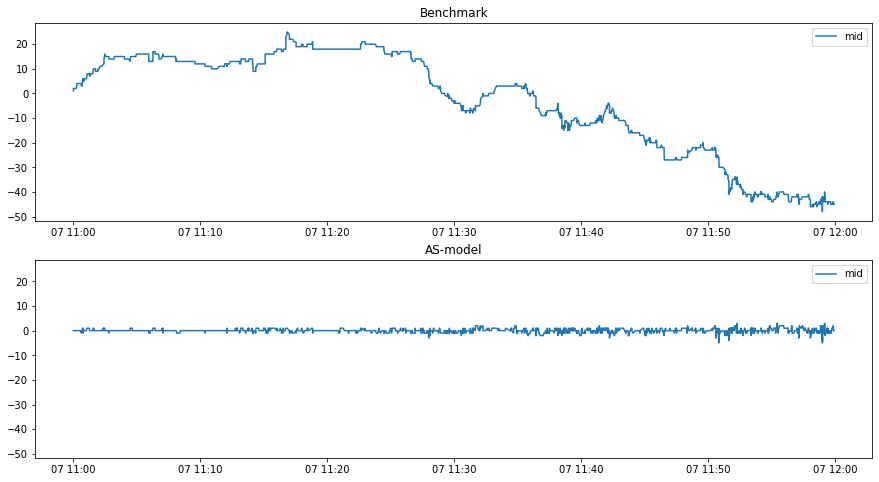

In [21]:
# compare prices
fig, axes = plt.subplots(2, 1, figsize=(15, 8), sharey=True)

axes[0].plot(df_deals_b['Time'], df_deals_b['Inventory'], label='mid')
axes[0].title.set_text('Benchmark')
axes[0].legend()

axes[1].plot(df_deals_as['Time'], df_deals_as['Inventory'], label='mid')
axes[1].title.set_text('AS-model')
axes[1].legend()

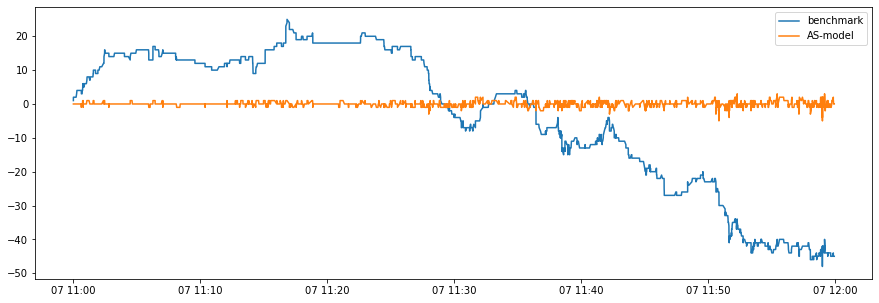

In [31]:
# compare prices
plt.figure(figsize=(15, 5))

plt.plot(df_deals_b['Time'], df_deals_b['Inventory'], label='benchmark')
plt.plot(df_deals_as['Time'], df_deals_as['Inventory'], label='AS-model')
plt.legend()

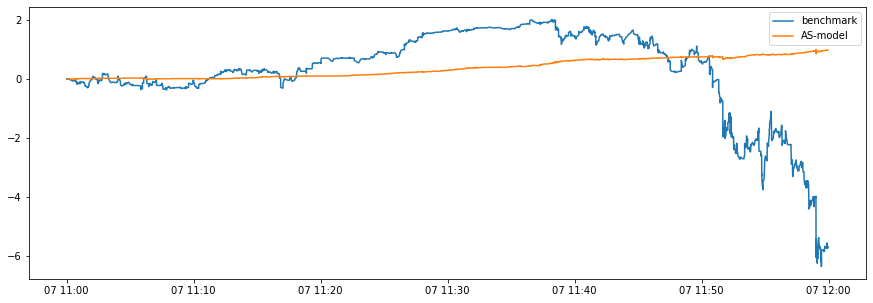

In [32]:
# compare prices
plt.figure(figsize=(15, 5))

plt.plot(df_deals_b['Time'], df_deals_b['PnL'], label='benchmark')
plt.plot(df_deals_as['Time'], df_deals_as['PnL'], label='AS-model')
plt.legend()

### Compare Eq and AS strategies

In [42]:
def sampler_realdata(market_orders, n, time_horizon):
    """
    """
    session_start = 10
    session_end = 17
    df = market_orders[(market_orders['H']>=session_start) & (market_orders['H']<=session_end)]
    dates = np.random.choice(df['Date'].unique(), n)
    hours = np.random.choice(range(session_start, session_end-time_horizon), n)
    
    for date, hour in zip(dates, hours):
        yield df[(df['H']==hour) & (df['Date']==date)]

In [43]:
def add_sim(df_simres, df_deals_A, df_deals_B):
    """
    Auxilary function
    """
    # Statistics: PL, MinPL, Q, MaxQ,
    last_deal_A = df_deals_A.iloc[-1]
    last_deal_B = df_deals_B.iloc[-1]
    
    row = {}
    row['A_spread'] = df_deals_A['Spread'].mean()
    row['A_PL'] = last_deal_A['PnL']
    row['A_MinPL'] = df_deals_A['PnL'].min()
    row['A_Q'] = last_deal_A['Inventory']
    row['A_MaxQ'] = df_deals_A['Inventory'].abs().max()
    row['A_N'] = df_deals_A[df_deals_A['Side']!=0].shape[0]
    row['A_avPL'] = last_deal_A['PnL'] / df_deals_A[df_deals_A['Side']!=0].shape[0]
    
    row['B_spread'] = df_deals_B['Spread'].mean()
    row['B_PL'] = last_deal_B['PnL']
    row['B_MinPL'] = df_deals_B['PnL'].min()
    row['B_Q'] = last_deal_B['Inventory']
    row['B_MaxQ'] = df_deals_B['Inventory'].abs().max()
    row['B_N'] = df_deals_B[df_deals_B['Side']!=0].shape[0]
    row['B_avPL'] = last_deal_B['PnL'] / df_deals_B[df_deals_B['Side']!=0].shape[0]
    

    return df_simres.append(pd.DataFrame(row, index=[0]), ignore_index=True)

In [51]:
sta = strategies.ASModel1Strategy(ticksize=0.0025, gamma=0.2, k=2/0.0067, sigma=0.17)

In [52]:
stq = strategies.EquiDistantStrategy(ticksize=0.0025)

In [53]:
# columns = ['A_PL', 'A_MinPL', 'A_Q', 'A_MaxQ', 'B_PL', 'B_MinPL', 'B_Q', 'B_MaxQ']
df_simres = pd.DataFrame()

for df in tqdm(sampler_realdata(market_orders, 500, 1), total=500):
    if df.shape[0] == 0:
        continue

#     print(df['Time'].iloc[0], df['Time'].iloc[-1], df.shape)
    df_deals_EQ = stq.run_period_sim(df, distance=2)
    df_deals_AS = sta.run_period_sim(df, 0, 0, min_spread=2, max_distance=5)
    df_simres = add_sim(df_simres, df_deals_AS, df_deals_EQ)


  0%|          | 0/500 [00:00<?, ?it/s]

C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Volume'] = df['SIZE_sum']
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:260: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Side'] = (df['AGGRESSOR_SIDE'] == 'B') * 2 - 1
C:\Users\Sharp.Ra\PyProjects\FinalMDS\strategies.py:455: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

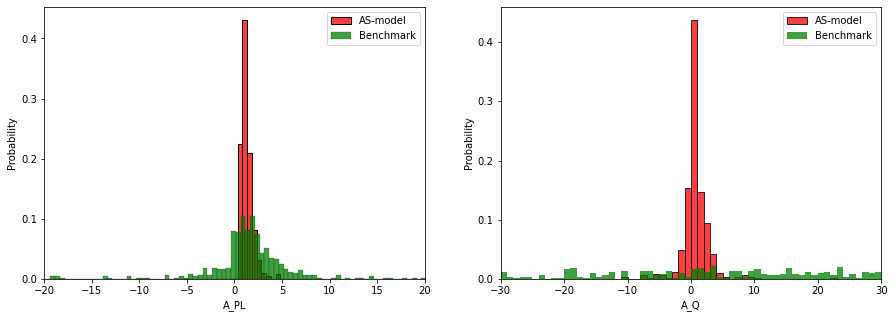

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_PL', color='r', ax=axes[0], label='AS-model', binwidth=0.5, stat='probability')
sns.histplot(data=df_simres, x='B_PL', color='g', ax=axes[0], label='Benchmark', binwidth=0.5, stat='probability')
axes[0].set_xlim([-20, 20])
axes[0].legend()

sns.histplot(data=df_simres, x='A_Q', color='r', ax=axes[1], label='AS-model', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_Q', color='g', ax=axes[1], label='Benchmark', binwidth=1, stat='probability')
axes[1].set_xlim([-30, 30])
axes[1].legend()

In [55]:
df_simres[:5]

,A_spread,A_PL,A_MinPL,A_Q,A_MaxQ,A_N,A_avPL,B_spread,B_PL,B_MinPL,B_Q,B_MaxQ,B_N,B_avPL
0,0.009836,0.835002,0.00000,2.0,4.0,472,0.001769,0.011395,2.189996,-0.287535,-8.0,29.0,220,0.009955
1,0.009811,2.005000,0.00000,0.0,4.0,960,0.002089,0.011444,-4.888780,-10.947307,167.0,170.0,839,-0.005827
2,0.009632,0.631252,-0.00875,-1.0,3.0,337,0.001873,0.011505,-3.907384,-5.130053,-86.0,90.0,180,-0.021708
3,0.009858,1.077502,0.00000,-2.0,5.0,618,0.001744,0.011445,3.855025,-0.570018,-38.0,39.0,376,0.010253
4,0.009674,0.844998,0.00500,-2.0,6.0,472,0.001790,0.011407,-0.047449,-0.729968,27.0,30.0,269,-0.000176


In [56]:
def stat_df(df_simres):
    df_res = pd.DataFrame(index=['AS-model strategy', 'Benchmark strategy'])
    
    for model in ["AS-model strategy", "Benchmark strategy"]:
        prefix = "A_" if model=="AS-model strategy" else "B_"
        
        df_res.loc[model, 'Average spread'] = df_simres[prefix+'spread'].mean()
        df_res.loc[model, 'Mean PL'] = df_simres[prefix+'PL'].mean()
        df_res.loc[model, 'Std PL'] = df_simres[prefix+'PL'].std()

        df_res.loc[model, 'Mean final Q'] = df_simres[prefix+'Q'].mean()
        df_res.loc[model, 'Std final Q'] = df_simres[prefix+'Q'].std()

        df_res.loc[model, 'Mean N'] = df_simres[prefix+'N'].mean()
        df_res.loc[model, 'Std N'] = df_simres[prefix+'N'].std()

        df_res.loc[model, 'Mean max Q'] = df_simres[prefix+'MaxQ'].mean()
        df_res.loc[model, 'Std max Q'] = df_simres[prefix+'MaxQ'].std()

        df_res.loc[model, 'Mean PL a deal'] = (df_simres[prefix+'PL'] / df_simres[prefix+'N']).mean()
        df_res.loc[model, 'Std PL a deal'] = (df_simres[prefix+'PL'] / df_simres[prefix+'N']).std()
    
    return df_res

In [156]:
stat_df(df_simres)

,Average spread,Mean PL,Std PL,Mean final Q,Std final Q,Mean N,Std N,Mean max Q,Std max Q,Mean PL a deal,Std PL a deal
AS-model strategy,0.009679,1.278368,0.622750,0.350806,3.031471,693.229839,421.147772,4.532258,3.131942,0.001906,0.000338
Benchmark strategy,0.011370,1.679556,7.161555,9.798387,100.102370,522.754032,523.932292,63.145161,87.261774,0.004170,0.007915


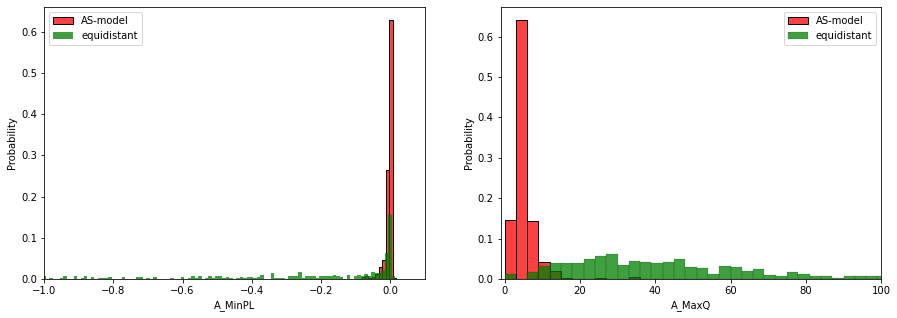

In [155]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_MinPL', color='r', ax=axes[0], label='AS-model', binwidth=0.01, stat='probability')
sns.histplot(data=df_simres, x='B_MinPL', color='g', ax=axes[0], label='equidistant', binwidth=0.01, stat='probability')
axes[0].set_xlim([-1, 0.1])
axes[0].legend()

sns.histplot(data=df_simres, x='A_MaxQ', color='r', ax=axes[1], label='AS-model', binwidth=3, stat='probability')
sns.histplot(data=df_simres, x='B_MaxQ', color='g', ax=axes[1], label='equidistant', binwidth=3, stat='probability')
axes[1].set_xlim([-1, 100])
axes[1].legend()

## Generated data

In [157]:
import generator
reload(generator)

<module 'generator' from 'C:\\Users\\Sharp.Ra\\PyProjects\\FinalMDS\\generator.py'>

In [158]:
start_date = datetime.datetime(2021, 1, 1, 11, 0, 0)
end_date = datetime.datetime(2021, 1, 1, 13, 0, 0)

In [159]:
# LOAD spreads
spreads = np.load('spreads.npz')['arr_0']
spreads

array([0.16907321, 0.31100837, 0.35036459, 0.13398757, 0.02894879,
       0.00661747])

In [160]:
gen = generator.Market(0, 0.14, 0.0025, spreads)

In [161]:
# LOAD PMF for x50 volumes
gen.init_x0_model('PMFx50.npz')

In [162]:
# Load KDE model for xx volumes
gen.init_xx_model('kde_model.pickle')

In [165]:
dfg = gen.order_book(2200, 75., start_date, end_date, 0.5, 0.36)
dfg.shape

(4442, 6)

In [166]:
dfg[:5]

,Time,Side,Volume,Impact,BID,ASK
0,2021-01-01 11:00:00.731804,-1,100.0,0.0000,74.9975,75.0000
1,2021-01-01 11:00:01.159065,1,250.0,0.0025,75.0000,75.0075
2,2021-01-01 11:00:02.780037,1,177.0,0.0000,75.0000,75.0050
3,2021-01-01 11:00:03.822161,1,50.0,0.0000,75.0000,75.0075
4,2021-01-01 11:00:04.881308,1,50.0,0.0000,75.0025,75.0075


### AS-model on generated data

In [167]:
df_deals = sta.run_period_sim(dfg, W=0, Q=0, min_spread=2, max_distance=5, preprocess=False)

In [168]:
df_deals[:5]

,Time,Wealth,Inventory,Side,Mid,Bid,Ask,R-price,Spread,PnL
0,2021-01-01 11:00:00.731804,0.0,0.0,0.0,74.99875,74.9900,75.0100,74.99875,0.018252,0.0
1,2021-01-01 11:00:01.159065,0.0,0.0,0.0,75.00375,74.9950,75.0150,75.00375,0.018252,0.0
2,2021-01-01 11:00:02.780037,0.0,0.0,0.0,75.00250,74.9925,75.0125,75.00250,0.018249,0.0
3,2021-01-01 11:00:03.822161,0.0,0.0,0.0,75.00375,74.9950,75.0150,75.00375,0.018247,0.0
4,2021-01-01 11:00:04.881308,0.0,0.0,0.0,75.00500,74.9950,75.0150,75.00500,0.018246,0.0


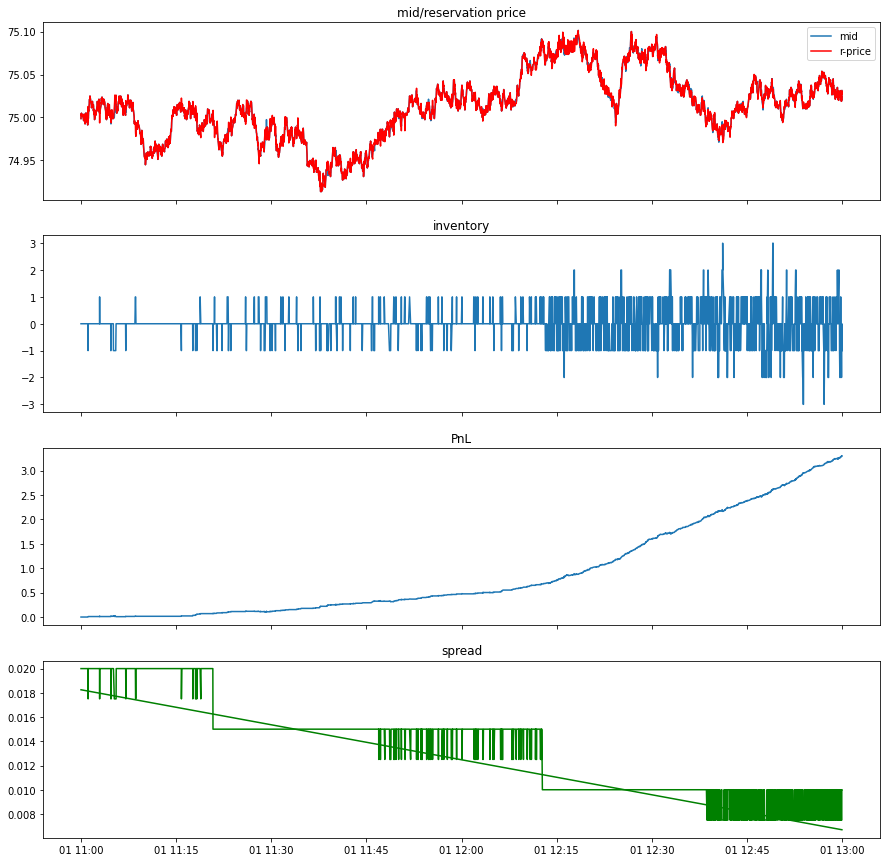

In [169]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='theoretical spread')
axes[3].plot(df_deals['Time'], df_deals['Ask']-df_deals['Bid'], 'g', label='rounded spread')
axes[3].title.set_text('spread')

In [170]:
df_deals[df_deals['Side']!=0].shape

(1085, 10)

### Equidistant-base strategy

In [171]:
df_deals = stq.run_period_sim(dfg, 2, preprocess=False)

In [172]:
df_deals.shape

(4442, 10)

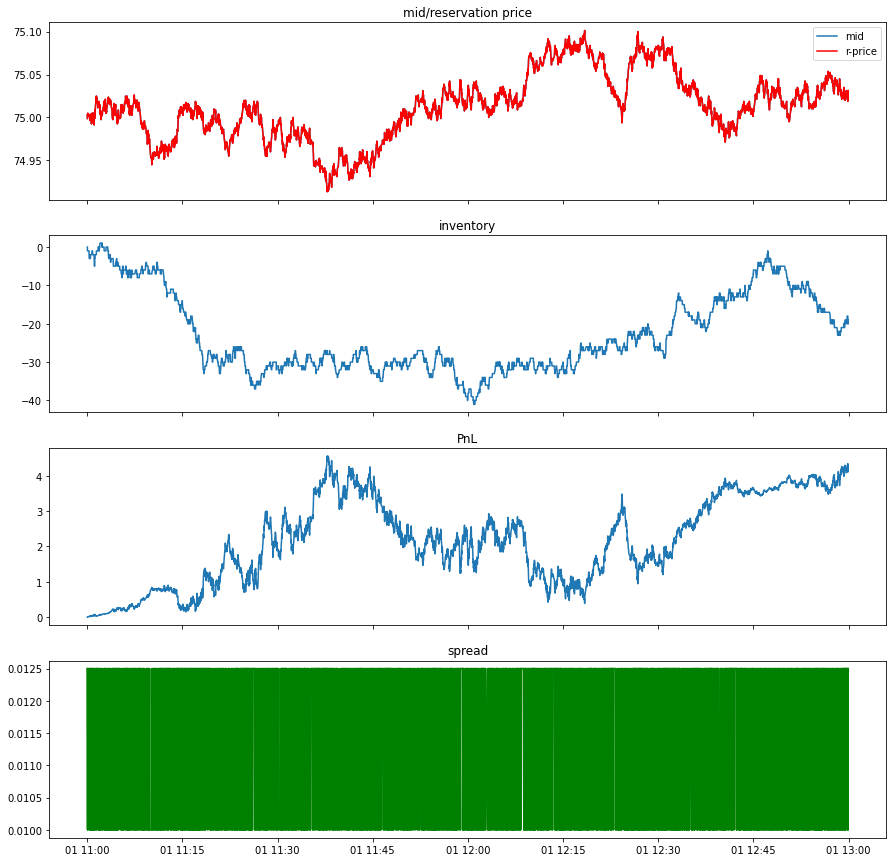

In [173]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(15, 15))

axes[0].plot(df_deals['Time'], df_deals['Mid'], label='mid')
axes[0].plot(df_deals['Time'], df_deals['R-price'], 'r', label='r-price')
axes[0].title.set_text('mid/reservation price')
axes[0].legend()

axes[1].plot(df_deals['Time'], df_deals['Inventory'], label='inventory')
axes[1].title.set_text('inventory')

axes[2].plot(df_deals['Time'], df_deals['PnL'], label='PnL')
axes[2].title.set_text('PnL')

axes[3].plot(df_deals['Time'], df_deals['Spread'], 'g', label='theoretical spread')
axes[3].plot(df_deals['Time'], df_deals['Ask']-df_deals['Bid'], 'g', label='rounded spread')
axes[3].title.set_text('spread')

In [55]:
df_deals[df_deals['Side']!=0].shape

(996, 10)

### Compare strategies

In [174]:
df_simres = pd.DataFrame()

for _ in tqdm(range(500)):
    dfg = gen.order_book(2200, 75., start_date, end_date, 0.5, 0.36)

#     print(df['Time'].iloc[0], df['Time'].iloc[-1], df.shape)
    df_deals_EQ = stq.run_period_sim(dfg, 2, preprocess=False)
    df_deals_AS = sta.run_period_sim(dfg, 0, 0, min_spread=2, max_distance=5, preprocess=False)
    df_simres = add_sim(df_simres, df_deals_AS, df_deals_EQ)

  0%|          | 0/500 [00:00<?, ?it/s]

In [175]:
df_simres[:5]

,A_spread,A_PL,A_MinPL,A_Q,A_MaxQ,A_N,A_avPL,B_spread,B_PL,B_MinPL,B_Q,B_MaxQ,B_N,B_avPL
0,0.012489,3.33250,0.0,-1.0,3.0,1051,0.003171,0.011340,16.29500,-0.10250,-58.0,61.0,994,0.016393
1,0.012520,3.01375,0.0,-1.0,3.0,1015,0.002969,0.011374,9.63125,-0.04000,3.0,37.0,989,0.009738
2,0.012546,3.01250,0.0,0.0,3.0,966,0.003119,0.011367,4.61750,0.00000,-4.0,20.0,982,0.004702
3,0.012414,3.32250,0.0,0.0,3.0,1078,0.003082,0.011385,5.52625,-0.00625,7.0,17.0,957,0.005775
4,0.012505,2.96750,0.0,0.0,5.0,1000,0.002968,0.011389,9.46500,0.00000,0.0,47.0,984,0.009619


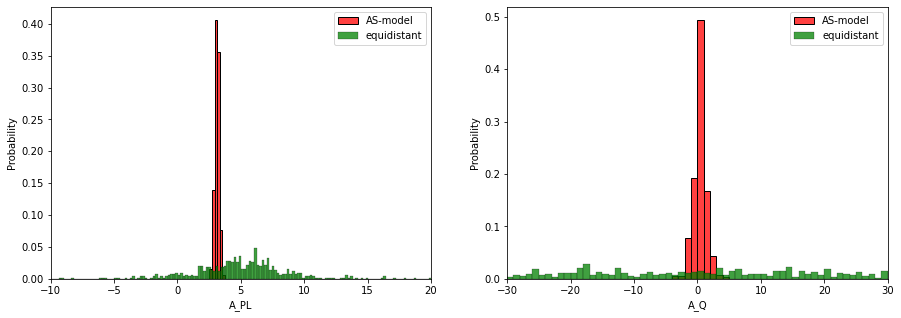

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_PL', color='r', ax=axes[0], label='AS-model', binwidth=0.2, stat='probability')
sns.histplot(data=df_simres, x='B_PL', color='g', ax=axes[0], label='equidistant', binwidth=0.2, stat='probability')
axes[0].set_xlim([-10, 20])
axes[0].legend()

sns.histplot(data=df_simres, x='A_Q', color='r', ax=axes[1], label='AS-model', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_Q', color='g', ax=axes[1], label='equidistant', binwidth=1, stat='probability')
axes[1].set_xlim([-30, 30])
axes[1].legend()

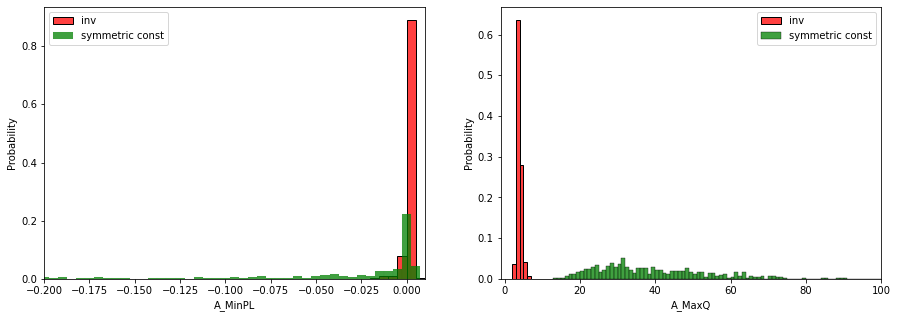

In [181]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df_simres, x='A_MinPL', color='r', ax=axes[0], label='AS-model', binwidth=0.005, stat='probability')
sns.histplot(data=df_simres, x='B_MinPL', color='g', ax=axes[0], label='equidistant', binwidth=0.005, stat='probability')
axes[0].set_xlim([-0.2, 0.01])
axes[0].legend()

sns.histplot(data=df_simres, x='A_MaxQ', color='r', ax=axes[1], label='AS-model', binwidth=1, stat='probability')
sns.histplot(data=df_simres, x='B_MaxQ', color='g', ax=axes[1], label='equidistant', binwidth=1, stat='probability')
axes[1].set_xlim([-1, 100])
axes[1].legend()

In [64]:
df_simres

,A_PL,A_MinPL,A_Q,A_MaxQ,B_PL,B_MinPL,B_Q,B_MaxQ
0,6.60875,0.00000,1.0,4.0,2.76875,-0.00375,-17.0,21.0
1,5.91625,0.00500,-3.0,3.0,4.13375,-2.97375,-39.0,47.0
2,6.99750,0.00000,0.0,5.0,6.93000,0.00000,6.0,11.0
3,6.50750,0.00000,0.0,4.0,5.99500,0.00000,2.0,15.0
4,6.41000,0.00375,1.0,4.0,5.84500,-0.82250,-16.0,34.0
...,...,...,...,...,...,...,...,...
495,6.51250,0.00000,0.0,4.0,3.10500,-0.73375,-18.0,23.0
496,6.50500,0.00000,1.0,3.0,6.30000,0.00000,6.0,27.0
497,6.35750,0.00000,-2.0,4.0,4.04000,-0.01375,2.0,30.0
498,6.47500,0.00375,0.0,4.0,4.68750,0.00000,5.0,25.0


In [182]:
stat_df(df_simres)

,Average spread,Mean PL,Std PL,Mean final Q,Std final Q,Mean N,Std N,Mean max Q,Std max Q,Mean PL a deal,Std PL a deal
AS-model strategy,0.012472,3.101990,0.170676,-0.092,1.070433,1014.212,32.169564,3.348,0.657084,0.003058,0.000130
Benchmark strategy,0.011371,5.015077,3.999991,-0.680,30.007841,986.924,28.350904,38.352,14.841855,0.005090,0.004058
